In [2]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d, interp2d
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
from IPython.display import display, clear_output
from jupyterthemes import jtplot
import time
import scipy as scipy
import csv
import matplotlib.patches as mpatches
from sklearn import linear_model
from sklearn.decomposition import PCA

jtplot.style(theme = 'gruvboxd')

In [3]:
import math as math

In [4]:
total_time = 17500
scenarios = 10
stoch_base_ER = 0.1
sample_no = 30
P0_Be10 = 4.02
P0_He3 = 128.0
P0_C14 = 12.76

In [5]:
SLHL_Be10 = P0_Be10
SLHL_He3 = P0_He3
scaling_factor = 1.0

In [6]:
def CN_stoch_in_fxn(ERs_all):
    CN_import = np.empty((total_time, 4, scenarios))
    for i in range(scenarios):
        CN_import[:,:3,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/STO_C14_Be10_ER' + str(ERs_all[i]) + '_expmat.csv', 
                                          delimiter = ',')

        CN_import[:,3,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/STO_He3_ER' + str(ERs_all[i]) + '_surfmat.csv',
                              delimiter = ',')
        
    return CN_import

In [7]:
def ER_import(stoch_base_ER):
    read_in = open('D:/STEIN_paper/model_outputs/stochastic_erosion/erosion_sets/import_dates.csv')
    myreader = csv.reader(read_in)
    
    for row in myreader:
        mat_gen_dates = row[:]
    
    ERs = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/erosion_sets/ER_list_' + str(stoch_base_ER) + '_' + str(mat_gen_dates[30]) + '.csv',
                                  delimiter = ',')
        
    return ERs

In [8]:
pareto_3ER = [0.10039790132825553, 0.09974171566599452, 0.10938501917905012, 0.10704352837271704, 
              0.10338776236257217, 0.1087367824765483, 0.10839704966402405, 0.10465266112583306, 
              0.10733839927658555, 0.10244357377202078]
pareto_2ER = [0.10097234782865684, 0.10410151359957116, 0.09803559052545682, 0.1042266549131835, 
              0.0932084750845557, 0.09449050549642915, 0.09004006218883537, 0.09694779937407147, 
              0.10022528881913528, 0.10441945607282799]
pareto_1ER = [0.09927695923758087, 0.10484617359240724, 0.10444658076824657, 0.10912804075481758,
              0.10674019684143121, 0.10904956309288238, 0.10976018511139474, 0.10284410957451133,
              0.1043523791698602, 0.10143623412162636]
pareto_0ER = [0.09785674950573756, 0.09968263137347035, 0.09829857967836945, 0.09961087699132304,
              0.0958566827114354, 0.10146451425663854, 0.09806014551360605, 0.09626150863452168, 
              0.09803252990200892, 0.09893872919234223]


import_05s = [0.04561371271128652, 0.052052256979133134, 0.050288956154872624, 0.05246138057649759,
             0.04617464306056679, 0.050269433478853646, 0.04502251132566917, 0.046130387494834696,
             0.05256702182710618, 0.05237092987841763]

ERs_25 = ER_import(0.25)

master05 = np.empty((25000, 11, scenarios))
samples05 = np.empty((sample_no, 6, scenarios))

for i in range(scenarios):
    master05[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(import_05s[i]) + '.csv',  
                                  delimiter = ',')
    samples05[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(import_05s[i]) + '.csv',
                                  delimiter = ',')
    measured05 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(np.mean(import_05s)) + '.csv',
                            delimiter = ',')
    master_means05 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/all_year_means_output_' + str(np.mean(import_05s)) + '.csv',  
                                    delimiter = ',')
    
master25 = np.empty((25000, 11, scenarios))
samples25 = np.empty((sample_no, 6, scenarios))

for i in range(scenarios):
    master25[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(ERs_25[i]) + '.csv',  
                                  delimiter = ',')
    samples25[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(ERs_25[i]) + '.csv',
                                  delimiter = ',')
    measured25 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(np.mean(ERs_25)) + '.csv',
                            delimiter = ',')
    master_means25 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/all_year_means_output_' + str(np.mean(ERs_25)) + '.csv',  
                                    delimiter = ',')

In [9]:
def sampling_fxn(CN_import_matrix, sample_no, scenarios):
    P0_Be10 = SLHL_Be10 * scaling_factor
    P0_He3 = SLHL_Be10 * scaling_factor
    sampling_years = np.sort(np.random.choice(np.arange(int(total_time * 0.1),total_time),sample_no))
    sampling_mat = np.empty((sample_no, 6, scenarios))
    measured = np.empty((6,scenarios))
    
    for j in range(scenarios):
        
        sampling_14C = []
        sampling_Be = []
        sampling_rat = []
        sampling_3He = []
    
        for i in range(sample_no):           

            sampling_14C.append(CN_import_matrix[sampling_years[i],0,j])
            sampling_Be.append(CN_import_matrix[sampling_years[i],1,j])
            sampling_rat.append(CN_import_matrix[sampling_years[i],2,j])
            sampling_3He.append(CN_import_matrix[sampling_years[i],3,j])
        
        sampling_mat[:,0,j] = sampling_14C
        sampling_mat[:,1,j] = sampling_Be
        sampling_mat[:,2,j] = sampling_rat
        sampling_mat[:,3,j] = sampling_3He
        sampling_mat[:,4,j] = np.divide(sampling_3He,sampling_Be) * (P0_Be10 / P0_He3)
        sampling_mat[:,5,j] = sampling_years
        
        
        measured[0,j] = np.mean(sampling_mat[:,0,j])
        measured[1,j] = np.mean(sampling_mat[:,1,j])
        measured[2,j] = measured[0,j] / measured[1,j]
        measured[3,j] = np.mean(sampling_mat[:,3,j])
        measured[4,j] = (np.mean(sampling_mat[:,4,j]) / np.mean(sampling_mat[:,1])) * (P0_Be10 / P0_He3)
        measured[5,j] = (160 / 2.62 * P0_Be10 / measured[1,j])
    
    measured_ER = [(160 / 2.62 * P0_Be10 / measured[1,j]) for j in range(scenarios)]
    
    return sampling_mat, measured, measured_ER  

In [10]:
def high_yr_bias_fxn(num_biased_samples):
    bias_years = [[[np.argmax(master_list[l][:,5,j])] for j in range(scenarios)] for l in range(4)]

    bias_extract = np.empty((3, 1000, num_biased_samples, 6, scenarios))

    for j in range(scenarios):
        for l in range(3):
            bias_extract[l,:,:,:,j] = master_list[l][bias_years[l][j],:6,j] 

    bias_samples_1000 = [[sampling_fxn(master_list[j], sample_no, scenarios)[0] for k in range(1000)] for j in range(4)]  
    bias_samples_1000 = np.stack(bias_samples_1000)
    bias_measured = np.empty((3,1000,6,scenarios))

    for j in range(scenarios):
            for l in range(3):
                bias_samples_1000[l,:,:num_biased_samples,:,j] = bias_extract[l,:,:,:,j] 

    bias_measured = np.mean(bias_samples_1000, axis = 2)

    for j in range(scenarios):
        for k in range(1000):
            for l in range(3):
                bias_measured[l,k,5,j] = 160 / 2.62 * P0_Be10 / bias_measured[l,k,1,j]
                bias_measured[l,k,2,j] = bias_measured[l,k,0,j] / bias_measured[l,k,1,j]
                bias_measured[l,k,4,j] = bias_measured[l,k,3,j] / bias_measured[l,k,1,j] * (P0_Be10 / P0_He3)  

    bias_measured_ER = bias_measured[:,:,5,:][:]
    bias_ER_error = [[[(bias_measured_ER[l][k][j] - actual_ERs[l][j]) for j in range(scenarios)] for k in range(1000)] for l in range(4)]
    bias_C14_error = [[[(bias_measured[l][k,2,j] - actual_means_list[l][8][j])  for j in range(scenarios)] for k in range(1000)] for l in range(4)] 
    C14_perc = [[[bias_measured[l][k,0,j] / bias_measured[l][k,1,j] * (P0_Be10 / P0_C14) for j in range(scenarios)] for k in range(1000)] for l in range(4)] 

    return bias_measured_ER, bias_ER_error, bias_C14_error, C14_perc

In [11]:
def high_yr_bias_fxn_few(num_biased_samples):
    bias_years = [[[np.argmax(master_list[l][:,5,j])] for j in range(scenarios)] for l in range(4)]

    bias_extract = np.empty((3, 1000, num_biased_samples, 6, scenarios))

    for j in range(scenarios):
        for l in range(3):
            bias_extract[l,:,:,:,j] = master_list[l][bias_years[l][j],:6,j] 

    bias_samples_1000 = [[sampling_fxn(master_list[j], 5, scenarios)[0] for k in range(1000)] for j in range(4)]  
    bias_samples_1000 = np.stack(bias_samples_1000)
    bias_measured = np.empty((3,1000,6,scenarios))

    for j in range(scenarios):
            for l in range(3):
                bias_samples_1000[l,:,:num_biased_samples,:,j] = bias_extract[l,:,:,:,j] 

    bias_measured = np.mean(bias_samples_1000, axis = 2)

    for j in range(scenarios):
        for k in range(1000):
            for l in range(3):
                bias_measured[l,k,5,j] = 160 / 2.62 * P0_Be10 / bias_measured[l,k,1,j]
                bias_measured[l,k,2,j] = bias_measured[l,k,0,j] / bias_measured[l,k,1,j]
                bias_measured[l,k,4,j] = bias_measured[l,k,3,j] / bias_measured[l,k,1,j] * (P0_Be10 / P0_He3)  

    bias_measured_ER = bias_measured[:,:,5,:][:]
    bias_ER_error = [[[(bias_measured_ER[l][k][j] - actual_ERs[l][j]) for j in range(scenarios)] for k in range(1000)] for l in range(4)]
    bias_C14_error = [[[(bias_measured[l][k,2,j] - actual_means_list[l][8][j])  for j in range(scenarios)] for k in range(1000)] for l in range(4)] 
    C14_perc = [[[bias_measured[l][k,0,j] / bias_measured[l][k,1,j] * (P0_Be10 / P0_C14) for j in range(scenarios)] for k in range(1000)] for l in range(4)] 

    return bias_measured_ER, bias_ER_error, bias_C14_error, C14_perc

In [12]:
def high_yr_200_bias_fxn(num_biased_samples):
    scenarios = 10
    scenario = 7
    bias_years = [[[np.argmax(master_list[l][:,5,j])+150] for j in range(3,scenarios)] for l in range(4)]

    bias_extract = np.empty((3, 1000, num_biased_samples, 6, scenario))

    for j in range(scenario):
        for l in range(3):
            bias_extract[l,:,:,:,j] = master_list[l][bias_years[l][j],:6,j] 

    bias_samples_1000 = [[sampling_fxn(master_list[j], sample_no, scenario)[0] for k in range(1000)] for j in range(4)]  
    bias_samples_1000 = np.stack(bias_samples_1000)
    bias_measured = np.empty((3,1000,6,scenario))

    for j in range(scenario):
            for l in range(3):
                bias_samples_1000[l,:,:num_biased_samples,:,j] = bias_extract[l,:,:,:,j] 

    bias_measured = np.mean(bias_samples_1000, axis = 2)

    for j in range(scenario):
        for k in range(1000):
            for l in range(3):
                bias_measured[l,k,5,j] = 160 / 2.62 * P0_Be10 / bias_measured[l,k,1,j]
                bias_measured[l,k,2,j] = bias_measured[l,k,0,j] / bias_measured[l,k,1,j]
                bias_measured[l,k,4,j] = bias_measured[l,k,3,j] / bias_measured[l,k,1,j] * (P0_Be10 / P0_He3)  

    bias_measured_ER = bias_measured[:,:,5,:][:]
    bias_ER_error = [[[(bias_measured_ER[l][k][j] - actual_ERs[l][j+3]) for j in range(scenario)] for k in range(1000)] for l in range(4)]
    bias_C14_error = [[[(bias_measured[l][k,2,j] - actual_means_list[l][8][j+3])  for j in range(scenario)] for k in range(1000)] for l in range(4)] 
    C14_perc = [[[bias_measured[l][k,0,j] / bias_measured[l][k,1,j] * (P0_Be10 / P0_C14) for j in range(scenario)] for k in range(1000)] for l in range(4)] 
    
    return bias_measured_ER, bias_ER_error, bias_C14_error, C14_perc

In [13]:
def sampling_fxn_roll_bi(CN_import_matrix,sample_no,year):
    P0_Be10 = SLHL_Be10 * scaling_factor
    P0_He3 = SLHL_Be10 * scaling_factor
    sampling_years = np.sort(np.random.choice(np.arange(int(year * 0.1),year), sample_no))
    sampling_mat = np.empty((sample_no, 6))
    measured = np.empty((6,1))

    sampling_14C = []
    sampling_Be = []
    sampling_rat = []
    sampling_3He = []

    for i in range(sample_no):           

        sampling_14C.append(CN_import_matrix[sampling_years[i],0,run])
        sampling_Be.append(CN_import_matrix[sampling_years[i],1,run])
        sampling_rat.append(CN_import_matrix[sampling_years[i],2,run])
        sampling_3He.append(CN_import_matrix[sampling_years[i],3,run])

    sampling_mat[:,0] = sampling_14C
    sampling_mat[:,1] = sampling_Be
    sampling_mat[:,2] = sampling_rat
    sampling_mat[:,3] = sampling_3He
    sampling_mat[:,4] = np.divide(sampling_3He,sampling_Be) * (P0_Be10 / P0_He3)
    sampling_mat[:,5] = sampling_years


    measured[0,] = np.mean(sampling_mat[:0])
    measured[1,] = np.mean(sampling_mat[:1])
    measured[2,] = measured[0] / measured[1]
    measured[3,] = np.mean(sampling_mat[:,3])
    measured[4,] = (np.mean(sampling_mat[:,4]) / np.mean(sampling_mat[:,1])) * (P0_Be10 / P0_He3)
    measured[5,] = (160 / 2.62 * P0_Be10 / measured[1,])

    measured_ER = (160 / 2.62 * P0_Be10 / measured[1,])

    return sampling_mat, measured, measured_ER 

In [14]:
def rolling_bias(num_biased_samples,year,pareto,run):
    #    bias_years = [[[np.argmax(master_list[l][:,5,j])+150] for j in range(3,scenarios)] for l in range(4)]

    bias_extract = np.empty((num_biased_samples, 6))

    bias_extract[:,:] = master_list[pareto][year,:6,run] 

    bias_samples = sampling_fxn_roll_bi(master_list[pareto], 30, year)[0]
    bias_samples[:num_biased_samples,:] = bias_extract[:,:] 
    bias_measured = np.mean(bias_samples, axis = 0)
    
    bias_measured_ER = 160 / 2.62 * P0_Be10 / bias_measured[1]
    bias_measured_rat = bias_measured[0] / bias_measured[1]
    bias_measured_He = bias_measured[3] / bias_measured[1] * (P0_Be10 / P0_He3)  
  
    return bias_measured_ER, bias_measured_rat, bias_measured_He, bias_samples

In [15]:
master0 = np.empty((total_time, 11, scenarios))
samples0 = np.empty((sample_no, 6, scenarios))
He3_OG0 = np.empty((scenarios,))
Test_OG0 = np.empty((scenarios,))

for i in range(0,3):
    master0[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(pareto_0ER[i]) + '.csv',  
                                  delimiter = ',')
    samples0[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(pareto_0ER[i]) + '.csv',
                                  delimiter = ',')
    measured0 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(0.09840629477594534) + '.csv',
                            delimiter = ',')
    master_means0 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/all_year_means_output_' + str(0.09840629477594534) + '.csv',  
                                    delimiter = ',')
    He3_OG0[i]= np.mean(np.genfromtxt('D:/STEIN_paper/model_outputs/constant_erosion/CON_He3_ER' + str(pareto_0ER[i]) + '._surfmat.csv',
                                     delimiter = ',')[5000:,])
    Test_OG0[i] = np.mean(np.genfromtxt('D:/STEIN_paper/model_outputs/constant_erosion/CON_C14_10Be_ER' + str(pareto_0ER[i]) + '_expmat.csv', delimiter = ','))              
    master_means0 = np.vstack([master_means0, He3_OG0])
    
for i in range(5,9):
    master0[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(pareto_0ER[i]) + '.csv',  
                                  delimiter = ',')
    samples0[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(pareto_0ER[i]) + '.csv',
                                  delimiter = ',')
    measured0 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(0.09840629477594534) + '.csv',
                            delimiter = ',')
    master_means0 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/all_year_means_output_' + str(0.09840629477594534) + '.csv',  
                                    delimiter = ',')
    He3_OG0[i]= np.mean(np.genfromtxt('D:/STEIN_paper/model_outputs/constant_erosion/CON_He3_ER' + str(pareto_0ER[i]) + '._surfmat.csv',
                                     delimiter = ',')[5000:,])
    Test_OG0[i] = np.mean(np.genfromtxt('D:/STEIN_paper/model_outputs/constant_erosion/CON_C14_10Be_ER' + str(pareto_0ER[i]) + '_expmat.csv', delimiter = ','))              
    master_means0 = np.vstack([master_means0, He3_OG0])
    
master1 = np.empty((total_time, 11, scenarios))
samples1 = np.empty((sample_no, 6, scenarios))
He3_OG1 = np.empty((scenarios,))
Test_OG1 = np.empty((scenarios,))

for i in range(scenarios):
    master1[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(pareto_1ER[i]) + '.csv',  
                                  delimiter = ',')
    samples1[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(pareto_1ER[i]) + '.csv',
                                  delimiter = ',')
    measured1 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(np.mean(pareto_1ER)) + '.csv',
                            delimiter = ',')
    master_means1 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/all_year_means_output_' + str(np.mean(pareto_1ER)) + '.csv',  
                                    delimiter = ',')
    He3_OG1[i]= np.mean(np.genfromtxt('D:/STEIN_paper/model_outputs/constant_erosion/CON_He3_ER' + str(pareto_1ER[i]) + '._surfmat.csv',
                                     delimiter = ',')[5000:,])
    Test_OG1[i] = np.mean(np.genfromtxt('D:/STEIN_paper/model_outputs/constant_erosion/CON_C14_10Be_ER' + str(pareto_1ER[i]) + '_expmat.csv', delimiter = ','))              
    master_means1 = np.vstack([master_means1, He3_OG1])
    
master2 = np.empty((total_time, 11, scenarios))
samples2 = np.empty((sample_no, 6, scenarios))
He3_OG2 = np.empty((scenarios,))
Test_OG2 = np.empty((scenarios,))

for i in range(scenarios):
    master2[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(pareto_2ER[i]) + '.csv',  
                                  delimiter = ',')    
    samples2[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(pareto_2ER[i]) + '.csv',
                                  delimiter = ',')
    measured2 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(np.mean(pareto_2ER)) + '.csv',
                            delimiter = ',')
    master_means2 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/all_year_means_output_' + str(np.mean(pareto_2ER)) + '.csv',  
                                    delimiter = ',')
    He3_OG2[i]= np.mean(np.genfromtxt('D:/STEIN_paper/model_outputs/constant_erosion/CON_He3_ER' + str(pareto_2ER[i]) + '._surfmat.csv',
                                     delimiter = ',')[5000:,])
    Test_OG2[i] = np.mean(np.genfromtxt('D:/STEIN_paper/model_outputs/constant_erosion/CON_C14_10Be_ER' + str(pareto_2ER[i]) + '_expmat.csv', delimiter = ','))                     
    master_means2 = np.vstack([master_means1, He3_OG2])
    
master3 = np.empty((total_time, 11, scenarios))
samples3 = np.empty((sample_no, 6, scenarios))
He3_OG3 = np.empty((scenarios,))
Test_OG3 = np.empty((scenarios,))

for i in range(scenarios):
    master3[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(pareto_3ER[i]) + '.csv',  
                                  delimiter = ',')
    samples3[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(pareto_3ER[i]) + '.csv',
                                  delimiter = ',')
    measured3 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(np.mean(pareto_3ER)) + '.csv',
                            delimiter = ',')
    master_means3 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/all_year_means_output_' + str(np.mean(pareto_3ER)) + '.csv',  
                                    delimiter = ',')
    He3_OG3[i] = np.mean(np.genfromtxt('D:/STEIN_paper/model_outputs/constant_erosion/CON_He3_ER' + str(pareto_3ER[i]) + '._surfmat.csv',
                                     delimiter = ',')[5000:])
    master_means3 = np.vstack([master_means3, He3_OG3])

In [16]:
master_list = [master0, master1, master2, master3]
samples_list = [samples0, samples1, samples2, samples3]
measured_list = [measured0, measured1, measured2, measured3]
actual_means_list = [master_means0, master_means1, master_means2, master_means3]
actual_ERs = [[np.sum(master_list[k][1750:, 5, j]) / (17500 - 1750) for j in range(scenarios)] for k in range(4)]
measured_ER = [[(160 / 2.62 * P0_Be10 / measured_list[k][1,j]) for j in range(scenarios)] for k in range(4)]
ER_error = [[(actual_ERs[k][j] - measured_ER[k][j]) for j in range(scenarios)] for k in range(4)]
measured_He_ER = [[(160 / 2.62 * P0_He3 / measured_list[k][3,j]) for j in range(scenarios)] for k in range(4)]
C14_percent = [[[measured_list[k][0,j] / measured_list[k][1,j] * (P0_Be10 / P0_C14)] for j in range(scenarios)] for k in range(4)]
# scaled_C14_error = [[(measured_list[j][2,i] / measured_list[j][k,i]) - actual_means_list[j][8][i] for i in range(scenarios)] for j in range(3)] 
C14_error = [[measured_list[k][2,j] - actual_means_list[k][8][j] for j in range(scenarios)] for k in range(4)] 

In [17]:
sampling_1000 = [[sampling_fxn(master_list[k], sample_no, scenarios)[1] for i in range(1000)] for k in range(4)]  
C14_error_1000 = [[[sampling_1000[l][k][2,j] - actual_means_list[l][8][j] for j in range(scenarios)] for k in range(1000)] for l in range(4)]
C14_percent_1000 = [[[sampling_1000[l][k][0,j] / sampling_1000[l][k][1,j] * (P0_Be10/ P0_C14) for j in range(scenarios)] for k in range(1000)] for l in range(4)]
measured_ER_1000 = [[[(160 / 2.62 * P0_Be10 / sampling_1000[l][k][1][j]) for j in range(scenarios)] for k in range(1000)] for l in range(4)]
measured_He_ER_1000 = [[[(160 / 2.62 * P0_He3 / sampling_1000[l][k][3][j]) for j in range(scenarios)] for k in range(1000)] for l in range(4)]
ER_error_1000 = [[[(actual_ERs[l][j] - measured_ER_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(4)]
measured_perc_1000 = [[[(np.divide(sampling_1000[l][k][3][j],sampling_1000[l][k][1][j]) * (P0_Be10 / P0_He3))  for j in range(scenarios)] for k in range(1000)] for l in range(4)]
He_error_1000 = [[[(measured_perc_1000[l][k][j] - actual_means_list[l][10][j])*100 for j in range(scenarios)] for k in range(1000)] for l in range(4)]

C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero 

In [18]:
master_other = [master05, master25]
samples_other = [samples05, samples25]
measured_other = [measured05, measured25]
actual_means_other = [master_means05, master_means25]
actual_ERs_other = [[np.sum(master_other[k][2500:,5,j])/(25000 - 2500) for j in range(scenarios)] for k in range(2)]  
measured_ER_other = [[(160 / 2.62 * 3.89 / measured_other[k][1,j]) for j in range(scenarios)] for k in range(2)]
ER_error_other = [[(actual_ERs_other[k][j] - measured_ER_other[k][j]) for j in range(scenarios)] for k in range(2)]  
measured_He_ER_other = [[(160 / 2.62 * P0_He3 / measured_other[k][3,j]) for j in range(scenarios)] for k in range(2)]
C14_percent_other = [[[measured_other[k][0,j] / measured_other[k][1,j] * (3.89 / P0_C14)] for j in range(scenarios)] for k in range(2)]
C14_error_other = [[measured_other[k][2,j] - actual_means_other[k][8][j] for j in range(scenarios)] for k in range(2)] 
sampling_1000_other = [[sampling_fxn(master_other[k], sample_no, scenarios)[1] for i in range(1000)] for k in range(2)]  
C14_error_1000_other = [[[sampling_1000_other[l][k][2,j] - actual_means_other[l][8][j] for j in range(scenarios)] for k in range(1000)] for l in range(2)]
C14_percent_1000_other = [[[sampling_1000_other[l][k][0,j] / sampling_1000_other[l][k][1,j] * (3.89 / P0_C14) for j in range(scenarios)] for k in range(1000)] for l in range(2)]
measured_ER_1000_other = [[[(160 / 2.62 * 3.89 / sampling_1000_other[l][k][1][j]) for j in range(scenarios)] for k in range(1000)] for l in range(2)]
measured_He_ER_1000_other = [[[(160 / 2.62 * P0_He3 / sampling_1000_other[l][k][3][j]) for j in range(scenarios)] for k in range(1000)] for l in range(2)]
ER_error_1000_other = [[[(actual_ERs_other[l][j] - measured_ER_1000_other[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(2)]
measured_perc_1000_other = [[[(np.divide(sampling_1000_other[l][k][3][j],sampling_1000_other[l][k][1][j]) * (3.89 / P0_He3))  for j in range(scenarios)] for k in range(1000)] for l in range(2)]
He_error_1000_other = [[[(measured_perc_1000_other[l][k][j] - actual_means_other[l][10][j])*100 for j in range(scenarios)] for k in range(1000)] for l in range(2)]

In [19]:
only_3 = high_yr_bias_fxn_few(2)

C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: inva

In [33]:
bias_200_half = high_yr_200_bias_fxn(15)
bias_200_10 = high_yr_200_bias_fxn(10)
bias_200_5 = high_yr_200_bias_fxn(5)

C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
bias_high_half = high_yr_bias_fxn(15)

C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\dennis\Anaconda3\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [20]:
'''
Compiling a matrix of 1D objects to perform multiple linear regression or principal 
components analyis.
'''

actual_ERs_pca_list = []
measured_ER_pca_list = []
ER_error_pca_list = []
C14_error_pca_list = []
C14_perc_pca_list = []

# actual_ERs_pca_list.append(np.concatenate([np.concatenate([[actual_ERs[l][j]] * 1000 for j in range(scenarios)]) for l in range(1,4)]))  


[[[measured_ER_pca_list.append(measured_ER_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(1,4)]  
[[[ER_error_pca_list.append(ER_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(1,4)]  
[[[C14_error_pca_list.append(C14_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(1,4)]  
[[[C14_perc_pca_list.append(C14_percent_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(1,4)]

# actual_ERs_pca_list.append(np.concatenate([[actual_ERs[0][j]] * 1000 for j in range(0,3)]))
[[measured_ER_pca_list.append(measured_ER_1000[0][k][j]) for j in range(0,3)] for k in range(1000)] 
[[ER_error_pca_list.append(ER_error_1000[0][k][j]) for j in range(0,3)] for k in range(1000)]  
[[C14_error_pca_list.append(C14_error_1000[0][k][j]) for j in range(0,3)] for k in range(1000)]  
[[C14_perc_pca_list.append(C14_percent_1000[0][k][j]) for j in range(0,3)] for k in range(1000)]
 
# actual_ERs_pca_list.append(np.concatenate([[actual_ERs[0][j]] * 1000 for j in range(5,9)]))
[[measured_ER_pca_list.append(measured_ER_1000[0][k][j]) for j in range(5,9)] for k in range(1000)] 
[[ER_error_pca_list.append(ER_error_1000[0][k][j]) for j in range(5,9)] for k in range(1000)]  
[[C14_error_pca_list.append(C14_error_1000[0][k][j]) for j in range(5,9)] for k in range(1000)]  
[[C14_perc_pca_list.append(C14_percent_1000[0][k][j]) for j in range(5,9)] for k in range(1000)]

actual_ERs_pca_list = np.concatenate([[actual_ERs[0][0]] * 1000] + [[actual_ERs[0][1]] * 1000] +
               [[actual_ERs[0][2]] * 1000] + [[actual_ERs[0][6]] * 1000] + 
               [[actual_ERs[0][7]] * 1000] + [[actual_ERs[0][8]] * 1000] + 
               [[actual_ERs[0][7]] * 1000] +
               [np.concatenate([np.concatenate([[actual_ERs[l][j]] * 1000 for j in range(scenarios)]) for l in range(1,4)])])

pca_mat = np.empty((37000,5))
pca_mat[:,4] = actual_ERs_pca_list
pca_mat[:,1] = measured_ER_pca_list
pca_mat[:,3] = ER_error_pca_list
pca_mat[:,2] = C14_error_pca_list
pca_mat[:,0] = C14_perc_pca_list

In [21]:
actual_ERs_drop = [0] * 18
actual_ERs_drop[:4] = actual_ERs[0][5:9]
actual_ERs_drop[4:11] = actual_ERs[1][3:]
actual_ERs_drop[11:] = actual_ERs[2][3:]

In [36]:

actual_ERs_only_few = []
measured_ER_only_3 = []
ER_error_only_3 = []
C14_error_only_3 = []
C14_rat_only_3 = []
C14_perc_only_3 = []

# actual_ERs_pca_list.append(np.concatenate([np.concatenate([[actual_ERs[l][j]] * 1000 for j in range(scenarios)]) for l in range(1,4)]))  


[[[measured_ER_only_3.append(only_3[0][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]  
[[[ER_error_only_3.append(only_3[1][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]  
[[[C14_error_only_3.append(only_3[2][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]    
[[[C14_perc_only_3.append(only_3[3][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]    

# [[[C14_rat_pca_list_bias.append(bias_200_half[])]]]

actual_ERs_only_3 = np.array([np.concatenate([[actual_ERs_drop[i]] * 1000 for i in range(4,11)] + 
                                           [[actual_ERs_drop[i]] * 1000 for i in range(11,18)])])

# measured_ER_pca_list_bias = [v for v in measured_ER_pca_list_bias if not math.isnan(v) and not math.isinf(v)]
# ER_error_pca_list_bias = [v for v in ER_error_pca_list_bias if not math.isnan(v) and not math.isinf(v)]
# C14_error_pca_list_bias = [v for v in C14_error_pca_list_bias if not math.isnan(v) and not math.isinf(v)]

pca_mat_few = np.empty((14000,5))
pca_mat_few[:,4] = actual_ERs_only_3[np.logical_not(np.isnan(actual_ERs_pca_list_bias))]
pca_mat_few[:14000,1] = measured_ER_only_3
pca_mat_few[:14000,3] = ER_error_only_3
pca_mat_few[:14000,2] = [C14_error_only_3 [i] * (P0_Be10 / P0_C14) for i in range(14000)]
pca_mat_few[:14000,0] = C14_perc_only_3   

In [40]:
pca_mat_few_pred = np.exp(model_perc.predict(pca_mat_few[:,:3]))

In [837]:
np.mean(pca_mat_few[:,2])

0.5840305649259336

In [833]:
print(np.mean([(pca_mat_few_pred[i] - pca_mat_few[i,4])**2 for i in range(len(pca_mat_few))]),   
    np.mean([(pca_mat_few[i,1] - pca_mat_few[i,4])**2 for i in range(len(pca_mat_few))]))

8.40852694491252e-05 0.0007578402384931395


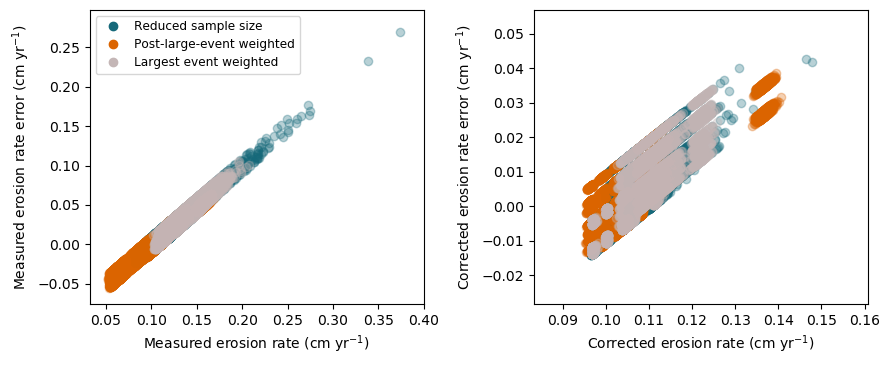

In [86]:
jtplot.reset()

fig, (ax1, ax2) = plt.subplots(ncols =2, nrows = 1,
                              figsize = (9,3.75),
                              tight_layout = True)
# plt.scatter(pca_mat_few[:,4], pca_mat_few[:,1], alpha = 0.3)

colors = ['#16697a', '#db6400', '#c4b6b6']
texts = ['Reduced sample size', 'Post-large-event weighted', 'Largest event weighted']

ax1.scatter(pca_mat_few[:,1], pca_mat_few[:,1] - pca_mat_few[:,4], 
            alpha = 0.3, color = colors[0])
ax1.scatter(pca_mat_bias[:,1], pca_mat_bias[:,1] - pca_mat_bias[:,4],  
            alpha = 0.3, color = colors[1])
ax1.scatter(pca_mat_bias_high[:,1], pca_mat_bias_high[:,1] - pca_mat_bias_high[:,4],  
            alpha = 0.3, color = colors[2])
ax1.set_xlabel('Measured erosion rate (cm yr$^{-1}$)')
ax1.set_ylabel('Measured erosion rate error (cm yr$^{-1}$)')

ax2.scatter( pca_mat_few_pred, pca_mat_few_pred - pca_mat_few[:,4], 
            alpha = 0.3, color = colors[0])
ax2.scatter(predictions_bias, predictions_bias - pca_mat_bias[:,4], 
            alpha = 0.3, color = colors[1])
ax2.scatter(predictions_bias_high, predictions_bias_high - pca_mat_bias_high[:,4], 
            alpha = 0.3, color = colors[2])
ax2.set_xlabel('Corrected erosion rate (cm yr$^{-1}$)')
ax2.set_ylabel('Corrected erosion rate error (cm yr$^{-1}$)')

patches = [ plt.plot([],[], marker='o', ms = 6, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax1.legend(handles = patches, fontsize = 8.75)

plt.savefig('D:/STEIN_paper/model_outputs/figures/corrected_erosion_rates_and_error.jpg')


In [46]:
'''
Compiling a matrix of 1D objects to perform multiple linear regression or principal 
components analyis.
'''

actual_ERs_pca_list_bias = []
measured_ER_pca_list_bias = []
ER_error_pca_list_bias = []
C14_error_pca_list_bias = []
C14_rat_pca_list_bias = []
C14_perc_pca_list_bias = []

# actual_ERs_pca_list.append(np.concatenate([np.concatenate([[actual_ERs[l][j]] * 1000 for j in range(scenarios)]) for l in range(1,4)]))  


[[[measured_ER_pca_list_bias.append(bias_200_half[0][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]  
[[[ER_error_pca_list_bias.append(bias_200_half[1][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]  
[[[C14_error_pca_list_bias.append(bias_200_half[2][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]    
[[[C14_perc_pca_list_bias.append(bias_200_half[3][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]    

# [[[C14_rat_pca_list_bias.append(bias_200_half[])]]]

actual_ERs_pca_list_bias = np.array([np.concatenate([[actual_ERs_drop[i]] * 1000 for i in range(4,11)] + 
                                           [[actual_ERs_drop[i]] * 1000 for i in range(11,18)])])

# measured_ER_pca_list_bias = [v for v in measured_ER_pca_list_bias if not math.isnan(v) and not math.isinf(v)]
# ER_error_pca_list_bias = [v for v in ER_error_pca_list_bias if not math.isnan(v) and not math.isinf(v)]
# C14_error_pca_list_bias = [v for v in C14_error_pca_list_bias if not math.isnan(v) and not math.isinf(v)]

pca_mat_bias = np.empty((14000,5))
pca_mat_bias[:,4] = actual_ERs_pca_list_bias[np.logical_not(np.isnan(actual_ERs_pca_list_bias))]
pca_mat_bias[:14000,1] = measured_ER_pca_list_bias
pca_mat_bias[:14000,3] = ER_error_pca_list_bias
pca_mat_bias[:14000,2] = [C14_error_pca_list_bias[i] * (P0_Be10 / P0_C14) for i in range(14000)]
pca_mat_bias[:14000,0] = C14_perc_pca_list_bias   

In [45]:
actual_ERs_pca_list_bias_high = []
measured_ER_pca_list_bias_high = []
ER_error_pca_list_bias_high = []
C14_error_pca_list_bias_high = []
C14_rat_pca_list_bias_high = []
C14_perc_pca_list_bias_high = []

# actual_ERs_pca_list.append(np.concatenate([np.concatenate([[actual_ERs[l][j]] * 1000 for j in range(scenarios)]) for l in range(1,4)]))  


[[[measured_ER_pca_list_bias_high.append(bias_high_half[0][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]  
[[[ER_error_pca_list_bias_high.append(bias_high_half[1][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]  
[[[C14_error_pca_list_bias_high.append(bias_high_half[2][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]    
[[[C14_perc_pca_list_bias_high.append(bias_high_half[3][l][k][j]) for j in range(7)] for k in range(1000)] for l in range(1,3)]    

actual_ERs_pca_list_bias_high = np.array([np.concatenate([[actual_ERs_drop[i]] * 1000 for i in range(4,11)] + 
                                           [[actual_ERs_drop[i]] * 1000 for i in range(11,18)])])

# measured_ER_pca_list_bias = [v for v in measured_ER_pca_list_bias if not math.isnan(v) and not math.isinf(v)]
# ER_error_pca_list_bias = [v for v in ER_error_pca_list_bias if not math.isnan(v) and not math.isinf(v)]
# C14_error_pca_list_bias = [v for v in C14_error_pca_list_bias if not math.isnan(v) and not math.isinf(v)]

pca_mat_bias_high = np.empty((14000,5))
pca_mat_bias_high[:,4] = actual_ERs_pca_list_bias_high
pca_mat_bias_high[:14000,1] = measured_ER_pca_list_bias_high
pca_mat_bias_high[:14000,3] = ER_error_pca_list_bias_high
pca_mat_bias_high[:14000,2] = [C14_error_pca_list_bias_high[i] * (P0_Be10 / P0_C14) for i in range(14000)]
pca_mat_bias_high[:14000,0] = C14_perc_pca_list_bias_high

In [150]:
pca_mat = pca_mat[37000:,:]

In [38]:
'''
Compiling a matrix of 1D objects to perform multiple linear regression or principal 
components analyis.
'''

actual_ERs_pca_list = []
measured_ER_pca_list = []
ER_error_pca_list = []
C14_error_pca_list = []
C14_perc_pca_list = []

# actual_ERs_pca_list.append(np.concatenate([np.concatenate([[actual_ERs[l][j]] * 1000 for j in range(scenarios)]) for l in range(1,4)]))  


[[[measured_ER_pca_list.append(measured_ER_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(1,4)]  
[[[ER_error_pca_list.append(ER_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(1,4)]  
[[[C14_error_pca_list.append(C14_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(1,4)]  
[[[C14_perc_pca_list.append(C14_percent_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(1,4)]

# actual_ERs_pca_list.append(np.concatenate([[actual_ERs[0][j]] * 1000 for j in range(0,3)]))
[[measured_ER_pca_list.append(measured_ER_1000[0][k][j]) for j in range(0,3)] for k in range(1000)] 
[[ER_error_pca_list.append(ER_error_1000[0][k][j]) for j in range(0,3)] for k in range(1000)]  
[[C14_error_pca_list.append(C14_error_1000[0][k][j]) for j in range(0,3)] for k in range(1000)]  
[[C14_perc_pca_list.append(C14_percent_1000[0][k][j]) for j in range(0,3)] for k in range(1000)]
 
    
# actual_ERs_pca_list.append(np.concatenate([[actual_ERs[0][j]] * 1000 for j in range(5,9)]))
[[measured_ER_pca_list.append(measured_ER_1000[0][k][j]) for j in range(5,9)] for k in range(1000)] 
[[ER_error_pca_list.append(ER_error_1000[0][k][j]) for j in range(5,9)] for k in range(1000)]  
[[C14_error_pca_list.append(C14_error_1000[0][k][j]) for j in range(5,9)] for k in range(1000)]  
[[C14_perc_pca_list.append(C14_percent_1000[0][k][j]) for j in range(5,9)] for k in range(1000)]

[[[measured_ER_pca_list.append(measured_ER_1000_other[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(2)]  
[[[ER_error_pca_list.append(ER_error_1000_other[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(2)]  
[[[C14_error_pca_list.append(C14_error_1000_other[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(2)]  
[[[C14_perc_pca_list.append(C14_percent_1000_other[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(2)]


actual_ERs_pca_list = np.concatenate([[actual_ERs[0][0]] * 1000] + [[actual_ERs[0][1]] * 1000] +
               [[actual_ERs[0][2]] * 1000] + [[actual_ERs[0][6]] * 1000] + 
               [[actual_ERs[0][7]] * 1000] + [[actual_ERs[0][8]] * 1000] + 
               [[actual_ERs[0][7]] * 1000] +
               [np.concatenate([np.concatenate([[actual_ERs[l][j]] * 1000 for j in range(scenarios)]) for l in range(1,4)])] + 
               [np.concatenate([np.concatenate([[actual_ERs_other[l][j]] * 1000 for j in range(scenarios)]) for l in range(2)])])

pca_mat = np.empty((57000,5))

pca_mat[:,4] = actual_ERs_pca_list
pca_mat[:,1] = measured_ER_pca_list
pca_mat[:,3] = ER_error_pca_list
pca_mat[:,2] = [C14_error_pca_list[i] * (P0_Be10 / P0_C14) for i in range(57000)]
pca_mat[:,0] = C14_perc_pca_list

# test_mat = np.empty((28500,5))

# pca_mat[:,4] = actual_ERs_pca_list
# pca_mat[:,1] = measured_ER_pca_list
# pca_mat[:,3] = ER_error_pca_list
# pca_mat[:,2] = C14_error_pca_list
# pca_mat[:,0] = C14_rat_pca_list


In [47]:
'''
Define the linear regression model. Here it is based on the measured ER and the difference between the
measured 14C/10Be ratio and the expected 14C/10Be ratio for constant erosion given the _measured_ (i.e.
not the actual) erosion rate.

This allows us to use only measured information to reconstruct the actual (total lost / total time)
erosion rate.
'''
# clf = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)
X = pca_mat[:,0:3]
y = np.log(pca_mat[:,4])

lm = linear_model.LinearRegression()
model_perc = lm.fit(X,y)

predictions_bias_high = np.exp(model_perc.predict(pca_mat_bias_high[:,0:3])) # first predictions based on the original dataset that trained the model.
predictions_bias = np.exp(model_perc.predict(pca_mat_bias[:,0:3])) # first predictions based on the original dataset that trained the model.

#print('coefficients: ' + str(lm.coef_), 'intercept: ' + str(lm.intercept_))

In [749]:
print(np.mean([(predictions_bias_high[i] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),   
    np.mean([(pca_mat_bias_high[i,1] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),  
     np.mean([(predictions_bias[i] - pca_mat_bias[i,4])**2 for i in range(len(predictions_bias))]),
     np.mean([(pca_mat_bias[i,1] - pca_mat_bias[i,4])**2 for i in range(len(predictions_bias))]))

0.011771646783432524 0.0011798327486162035 0.0020407058635686774 0.0006125289967488009


In [752]:
print(np.mean([(predictions_bias_high[i] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),   
    np.mean([(pca_mat_bias_high[i,1] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),  
     np.mean([(predictions_bias[i] - pca_mat_bias[i,4])**2 for i in range(len(predictions_bias))]),
     np.mean([(pca_mat_bias[i,1] - pca_mat_bias[i,4])**2 for i in range(len(predictions_bias))]))

0.002101996447986331 0.0011798327486162035 0.001458368256441331 0.0006125289967488009


In [754]:
print(np.mean([(predictions_bias_high[i] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),   
    np.mean([(pca_mat_bias_high[i,1] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),  
     np.mean([(predictions_bias[i] - pca_mat_bias[i,4])**2 for i in range(len(predictions_bias))]),
     np.mean([(pca_mat_bias[i,1] - pca_mat_bias[i,4])**2 for i in range(len(predictions_bias))]))

0.0004484137241176934 0.0011798327486162035 0.0008694690893800217 0.0006125289967488009


In [790]:
print(np.mean([(predictions_bias_high[i] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),   
    np.mean([(pca_mat_bias_high[i,1] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),  
     np.mean([(predictions_bias[i] - pca_mat_bias[i,4])**2 for i in range(len(predictions_bias))]),
     np.mean([(pca_mat_bias[i,1] - pca_mat_bias[i,4])**2 for i in range(len(predictions_bias))]))

0.0001039811044687238 0.0011798327486162035 0.00012268780247726345 0.0006125289967488009


In [743]:
print(np.mean([(predictions_bias_high[i] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),   
    np.mean([(pca_mat_bias_high[i,1] - pca_mat_bias_high[i,4])**2 for i in range(len(predictions_bias_high))]),  
     np.mean([(predictions_bias[i] - pca_mat_bias[i,4])**2 for i in range(len(predictions_bias))]),
     np.mean([(pca_mat_bias[i,1] - pca_mat_bias[i,4])**2 for i in rangQe(len(predictions_bias))]))

0.0001039811044687238 0.0011798327486162035 0.00012268780247726345 0.0006125289967488009


In [400]:
actual_ERs_drop = [0] * 18
actual_ERs_drop[:4] = actual_ERs[0][5:9]
actual_ERs_drop[4:11] = actual_ERs[1][3:]
actual_ERs_drop[11:] = actual_ERs[2][3:]


In [339]:
interp_ER_mes_list = []
interp_C14_perc_list = []
interp_ER_err_list = []
interp_ER_act_list = []

[[interp_C14_perc_list.append(C14_percent_other[l][j]) for j in range(scenarios)] for l in range(2)]  
[[interp_ER_mes_list.append(measured_ER_other[l][j]) for j in range(scenarios)] for  l in range(2)]  
[[interp_ER_err_list.append(ER_error_other[l][j]) for j in range(scenarios)] for l in range(2)]  
[[interp_ER_act_list.append(actual_ERs_other[l][j]) for j in range(scenarios)] for l in range(2)]  


# fix_interp = scipy.interpolate.interp2d(interp_C14_perc_list,interp_ER_mes_list,interp_ER_err_list, kind = 'linear')
# fix_interp = scipy.interpolate.interp2d(pca_mat[:,0],pca_mat[:,1],pca_mat[:,3], kind = 'spline')

[[None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None]]

In [341]:
interp_C14_perc_list= np.reshape(interp_C14_perc_list,20)

(-0.3, 0.9)

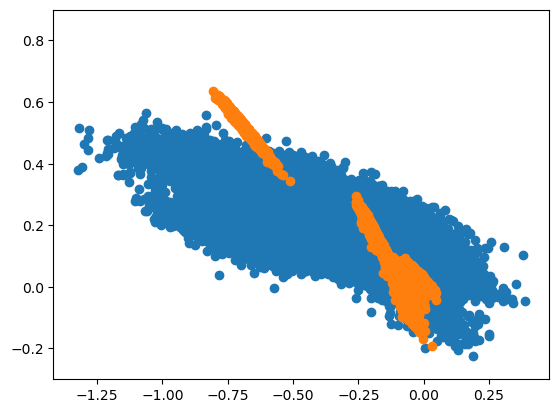

In [562]:
plt.scatter(pca_mat[:,2], (pca_mat[:,3] / pca_mat[:,4]))
plt.scatter(episodic_for_corr_mat[:,2], episodic_for_corr_mat[:,3] / actual_ERs_episodic)
plt.ylim(-0.3,0.9)

In [482]:
np.shape(pca_mat[:,2].reshape(-1,1))
np.shape(pca_mat_bias[:,2].reshape(-1,1)) 

(14000, 1)

In [483]:
# mat_mat = np.empty((20,4))
# mat_mat[:,0] = interp_C14_perc_list
# mat_mat[:,1] = interp_ER_mes_list
# mat_mat[:,2] = interp_ER_err_list
# mat_mat[:,3] = interp_ER_act_list

X = pca_mat[:,2].reshape(-1,1)
y = (pca_mat[:,3] / pca_mat[:,4])

lm = linear_model.LinearRegression()
model_model = lm.fit(X,y)

output = model_model.predict(pca_mat_bias[:,2].reshape(-1,1))
# test_out = fix_interp(pca_mat[:10000,0],pca_mat[:10000,1])

In [380]:
test_range = np.linspace(0,14000,14000)

<IPython.core.display.Javascript object>


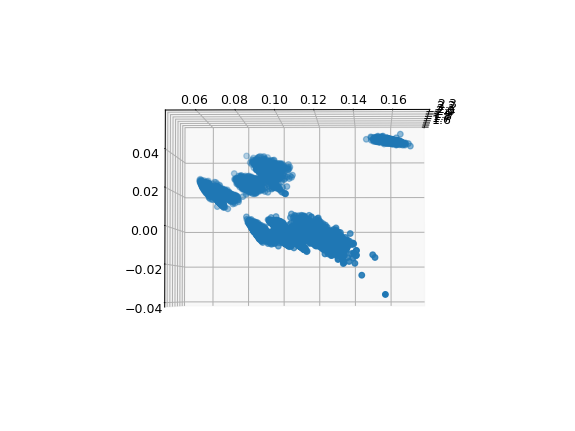

C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.
  # This is added back by InteractiveShellApp.init_path()


In [366]:
from mpl_toolkits.mplot3d import Axes3D
jtplot.reset()

%matplotlib notebook
%matplotlib notebook  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_mat_bias[:,0], pca_mat_bias[:,1], output)
plt.show(fig)

In [828]:
print('coefficients: ' + str(lm.coef_), 'intercept: ' + str(lm.intercept_))

coefficients: [ 0.0009185  -0.18133159] intercept: 0.11427225545468712


In [837]:
from mpl_toolkits.mplot3d import Axes3D
jtplot.reset()

%matplotlib notebook
%matplotlib notebook  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_mat[:,0], pca_mat[:,1], pca_mat[:,4])
plt.show(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [749]:
plt.ylabel('Absolute error (cm yr$^{-1}$)')
plt.xlabel('Actual erosion rate (cm yr$^{-1}$)')
plt.scatter(actual_ERs_pca_list_bias, abs(measured_ER_pca_list_bias - actual_ERs_pca_list_bias),
           c = '#d33938', s = 9, alpha = 0.05, label = 'No correction')
plt.scatter(actual_ERs_pca_list_bias, abs(predictions_bias - actual_ERs_pca_list_bias),
            alpha = 0.15, c = '#327c9f', s = 9, label = 'Linear model')
plt.ylim(-0.01,0.15)
colors = ['#d33938','#327c9f']
texts = ['No correction', 'Linear model prediction']
patches = [ plt.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, edgecolor = 'black')
plt.show()

# plt.savefig('D:/STEIN_paper/model_outputs/figures/bias_corrected_figure_pareto_distributions_bias_150yr.png',
#            transparent = True)
# plt.savefig('D:/STEIN_paper/model_outputs/figures/bias_corrected_figure_pareto_distributions_bias_150yr.jpg')


ValueError: operands could not be broadcast together with shapes (14000,2) (1,14000) 

In [797]:
episodic_for_correction = np.genfromtxt('D:/STEIN_paper/codes/output_matrices/episodic_erosion_for_linear_model_correction.csv',
                      delimiter = ',')
episodic_for_corr_05 = np.genfromtxt('D:/STEIN_paper/codes/output_matrices/episodic_erosion_for_linear_model_correction_05.csv',
                      delimiter = ',')
episodic_for_corr_25 = np.genfromtxt('D:/STEIN_paper/codes/output_matrices/episodic_erosion_for_linear_model_correction_25.csv',
                      delimiter = ',')

episodic_for_corr_mat = np.empty((6000,8))
episodic_for_corr_mat[:1000,0] = (episodic_for_correction[:1000,0] / episodic_for_correction[:1000,1]) * (4.02 / P0_C14)  
episodic_for_corr_mat[:1000,1] = episodic_for_correction[:1000,3]
episodic_for_corr_mat[:1000,2] = (5.78 - episodic_for_correction[:1000,5]) - 5.78
episodic_for_corr_mat[:1000,3] = [0.1 - episodic_for_correction[j,3] for j in range(1000)]
episodic_for_corr_mat[1000:2000,0] = (episodic_for_correction[:1000,6] / episodic_for_correction[:1000,7]) * (4.02 / P0_C14)  
episodic_for_corr_mat[1000:2000,1] = episodic_for_correction[:1000,9]
episodic_for_corr_mat[1000:2000,2] = (5.78 - episodic_for_correction[:1000,11]) - 5.78
episodic_for_corr_mat[1000:2000,3] = [0.1 - episodic_for_correction[j,9] for j in range(1000)]
episodic_for_corr_mat[2000:3000,0] = (episodic_for_corr_05[:1000,0] / episodic_for_corr_05[:1000,1]) * (4.02 / P0_C14)  
episodic_for_corr_mat[2000:3000,1] = episodic_for_corr_05[:1000,3]
episodic_for_corr_mat[2000:3000,2] = (5.144 - episodic_for_corr_05[:1000,5]) - 5.144
episodic_for_corr_mat[2000:3000,3] = [0.05 - episodic_for_corr_05[j,3] for j in range(1000)]
episodic_for_corr_mat[3000:4000,0] = (episodic_for_corr_05[:1000:,6] / episodic_for_corr_05[:1000,7]) * (4.02 / P0_C14)  
episodic_for_corr_mat[3000:4000,1] = episodic_for_corr_05[:1000,9]
episodic_for_corr_mat[3000:4000,2] = (5.144 - episodic_for_corr_05[:1000,11]) - 5.144
episodic_for_corr_mat[3000:4000,3] = [0.05 - episodic_for_corr_05[j,9] for j in range(1000)]
episodic_for_corr_mat[4000:5000,0] = (episodic_for_corr_25[:1000:,0] / episodic_for_corr_05[:1000,1]) * (4.02 / P0_C14)  
episodic_for_corr_mat[4000:5000,1] = episodic_for_corr_25[:1000,3]
episodic_for_corr_mat[4000:5000,2] = (episodic_for_corr_25[:1000,5]) - 7.358
episodic_for_corr_mat[4000:5000,3] = [0.25 - episodic_for_corr_25[j,3] for j in range(1000)]
episodic_for_corr_mat[5000:6000,0] = (episodic_for_corr_25[:1000,6] / episodic_for_corr_05[:1000,7]) * (4.02 / P0_C14)  
episodic_for_corr_mat[5000:6000,1] = episodic_for_corr_25[:1000,9]
episodic_for_corr_mat[5000:6000,2] = (episodic_for_corr_25[:1000,11]) - 7.358
episodic_for_corr_mat[5000:6000,3] = [0.25 - episodic_for_corr_25[j,9] for j in range(1000)]

episodic_for_corr_calc = [(160 / 2.62 * P0_Be10 / episodic_for_corr_mat[i,1]) for i in range(6000)]
# episodic_for_corr_mat[:,2] = [episodic_for_corr_mat[i,2] * (P0_Be10/P0_C14) for i in range(6000)]
actual_ERs_episodic = ([0.1] * 2000) +([0.05] * 2000) + ([0.25] * 2000)
# predictions_episodic = np.exp(model_perc.predict(episodic_for_corr_mat[4000:5000,:3]))#  * episodic_for_corr_mat[:,1] + episodic_for_corr_mat[:,1] #  first predictions based on the original dataset that trained the model.
# predictions_bias_high = model_perc.predict(pca_mat_bias_high[:,0:3])

In [792]:
print(np.mean([(predictions_episodic[i-4000] - actual_ERs_episodic[i])**2 for i in range(4000,5000)]),   
    np.mean([(episodic_for_corr_mat[i,1] - actual_ERs_episodic[i])**2 for i in range(4000,5000)]))  

0.0307511916849054 0.017120315092672356


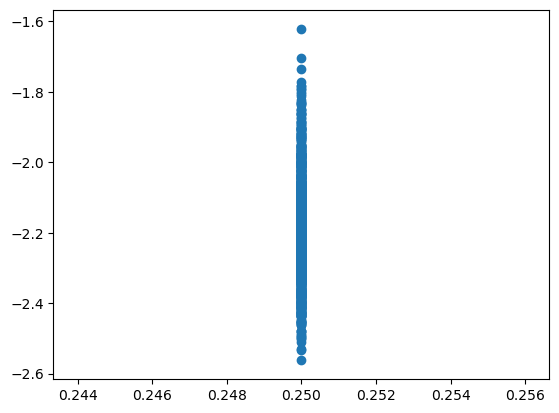

In [798]:
plt.scatter(actual_ERs_episodic[4000:5000],
           episodic_for_corr_mat[4000:5000,2])

# plt.scatter(actual_ERs_episodic[4000:5000], predictions_episodic)
# plt.scatter(episodic_for_corr_mat[4000:5000,2],
#            actual_ERs_episodic[4000:5000])

In [557]:
X = episodic_for_corr_mat[:3
y = episodic_for_corr_mat[:,4] / actual_ERs_episodic

lm = linear_model.LinearRegression()
epi_model= lm.fit(X,y)

output = epi_model.predict(pca_mat_bias_high[:,2].reshape(-1,1))

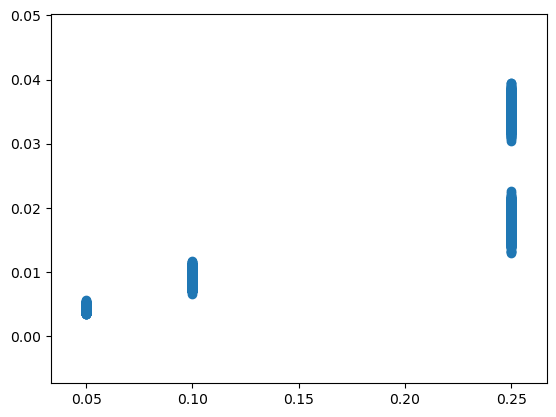

In [494]:
# plt.scatter(actual_ERs_episodic, predictions_episodic_error)
absolute_error = predictions_episodic_error * episodic_for_corr_mat[:,1]
plt.scatter(actual_ERs_episodic, absolute_error)

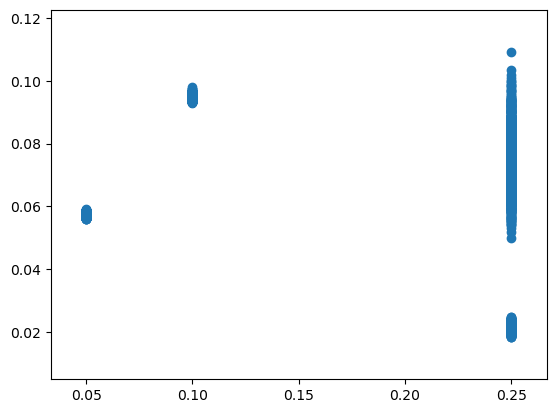

In [437]:
plt.scatter(actual_ERs_episodic, np.exp(predictions_episodic))

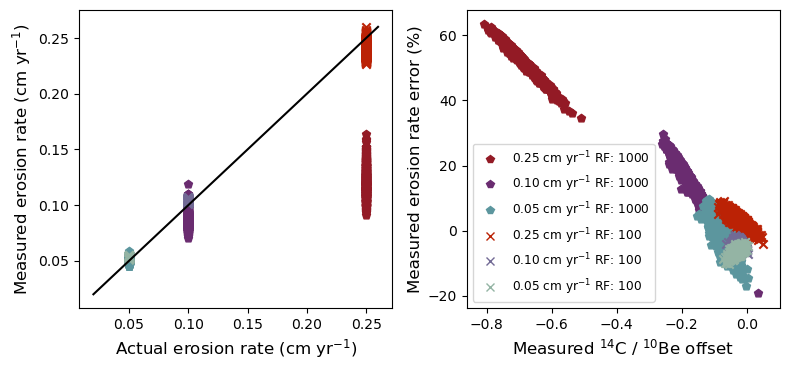

In [433]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                                   figsize = (8, 3.8), tight_layout = True)

ax1.plot([0.02,0.26],[0.02,0.26], c = 'black', ls = '-')

ax1.scatter(actual_ERs_episodic[:1000], episodic_for_corr_mat[:1000,1],
           c = '#6a2c70', marker = 'p') # 0.1, 1000 yr
ax1.scatter(actual_ERs_episodic[1000:2000], episodic_for_corr_mat[1000:2000,1],
           c = '#726a95', marker = 'x') # 0.1, 100 yr

ax1.scatter(actual_ERs_episodic[3000:4000], episodic_for_corr_mat[3000:4000,1],
           c = '#5c969e', marker = 'p') # 0.05, 1000 yr
ax1.scatter(actual_ERs_episodic[2000:3000], episodic_for_corr_mat[2000:3000,1],
           c = '#94b4a4', marker = 'x') # 0.05, 100 yr
ax1.scatter(actual_ERs_episodic[4000:5000],episodic_for_corr_25[:1000,3],
           c = '#931a25', marker = 'p') # 0.25 1000 yr
ax1.scatter(actual_ERs_episodic[5000:6000], episodic_for_corr_25[:1000,9],
           c = '#bb2205', marker = 'x') # 0.25 100 yr
ax1.set_xlabel('Actual erosion rate (cm yr$^{-1}$)', fontsize = 12)
ax1.set_ylabel('Measured erosion rate (cm yr$^{-1}$)', fontsize = 12)

######

ax2.scatter(episodic_for_corr_mat[4000:5000,2], episodic_for_corr_mat[4000:5000,3] / actual_ERs_episodic[4000:5000] * 100,
            c = '#931a25', marker = 'p')   # 0.25, 1000
ax2.scatter(episodic_for_corr_mat[:1000,2], episodic_for_corr_mat[:1000,3] / actual_ERs_episodic[:1000]*100, 
            c = '#6a2c70', marker = 'p')  # 0.1, 1000
ax2.scatter(episodic_for_corr_mat[3000:4000,2], episodic_for_corr_mat[3000:4000,3] / actual_ERs_episodic[3000:4000] * 100,
           c = '#5c969e', marker = 'p') # 0.05, 1000

ax2.scatter(episodic_for_corr_mat[5000:6000,2], episodic_for_corr_mat[5000:6000,3] / actual_ERs_episodic[5000:6000] * 100,
           c = '#bb2205', marker = 'x') # 0.25, 1000 yr
ax2.scatter(episodic_for_corr_mat[1000:2000,2], episodic_for_corr_mat[1000:2000,3] / actual_ERs_episodic[1000:2000] * 100,
           c = '#726a95', marker = 'x') # 0.1, 100
ax2.scatter(episodic_for_corr_mat[2000:3000,2], episodic_for_corr_mat[2000:3000,3] / actual_ERs_episodic[2000:3000] * 100,
           c = '#94b4a4', marker = 'x') # o.0.5, 100

colors = ['#931a25','#6a2c70', '#5c969e',
         '#bb2205','#726a95', '#94b4a4']
texts = ['0.25 cm yr$^{-1}$ RF: 1000', '0.10 cm yr$^{-1}$ RF: 1000', '0.05 cm yr$^{-1}$ RF: 1000',
         '0.25 cm yr$^{-1}$ RF: 100', '0.10 cm yr$^{-1}$ RF: 100', '0.05 cm yr$^{-1}$ RF: 100']
markers = ["p","p","p",'x','x','x']

patches = [ plt.plot([],[], marker=markers[i], ms = 6, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

ax2.set_xlabel('Measured $^{14}$C / $^{10}$Be offset', fontsize = 12)
ax2.set_ylabel('Measured erosion rate error (%)', fontsize = 12)
ax2.legend(handles = patches, fontsize = 8.75)

plt.savefig('D:/STEIN_paper/model_outputs/figures/episodic_erosion_figure.jpg')


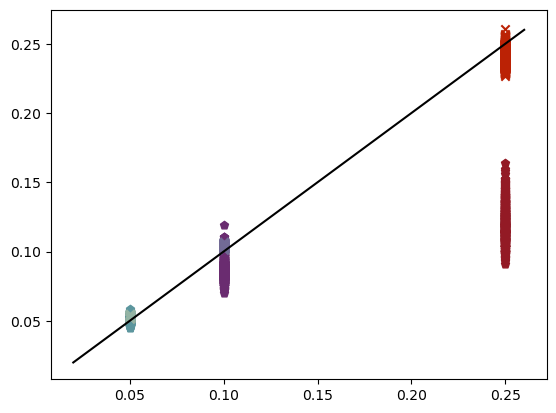

In [223]:
predictions = model_perc.predict(pca_mat[:,:3])

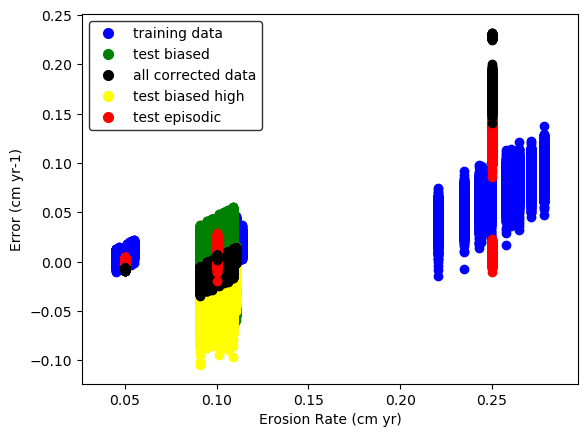

In [434]:
jtplot.reset()
plt.scatter(pca_mat[:,4],(pca_mat[:,4] - pca_mat[:,1]), c = 'blue')

#plt.scatter(pca_mat[:,4],(pca_mat[:,4] - np.exp(predictions)), c = 'black')
plt.scatter(pca_mat_bias[:,4], (pca_mat_bias[:,4] - pca_mat_bias[:,1]), c = 'green')
plt.scatter(pca_mat_bias[:,4], (pca_mat_bias[:,4] - np.exp(predictions_bias)), c = 'black')
plt.scatter(pca_mat_bias_high[:,4], (pca_mat_bias_high[:,4] - pca_mat_bias_high[:,1]), c = 'yellow')
plt.scatter(pca_mat_bias_high[:,4], (pca_mat_bias_high[:,4] - np.exp(predictions_bias_high)), c = 'black')
plt.scatter(actual_ERs_episodic, (actual_ERs_episodic - episodic_for_corr_mat[:,1]), c = 'red')
plt.scatter(actual_ERs_episodic, (actual_ERs_episodic - np.exp(predictions_episodic)), c = 'black')
plt.xlabel('Erosion Rate (cm yr)')
plt.ylabel('Error (cm yr-1)')
colors = ['blue', 'green', 'black', 'yellow', 'red']
texts = ['training data','test biased', 'all corrected data', 'test biased high', 'test episodic']

patches = [ plt.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, edgecolor = 'black')

# plt.savefig('D:/STEIN_paper/model_outputs/figures/14C_correction_initial.jpg')

In [180]:
model_perc.coef_

array([ 1.54599766,  3.97650103, -0.63723806])

In [179]:
model_perc.intercept_

-5.595275455979321

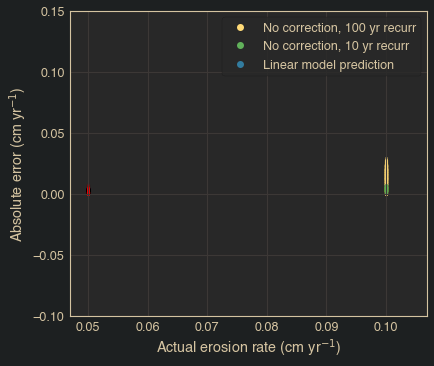

In [161]:
plt.ylabel('Absolute error (cm yr$^{-1}$)')
plt.xlabel('Actual erosion rate (cm yr$^{-1}$)')
plt.scatter(actual_ERs_episodic[:1000], abs(episodic_for_corr_mat[:1000,3]),
           c = '#ffda77', s = 9, alpha = 0.5, label = 'No correction, 100 yr recurr')
plt.scatter(actual_ERs_episodic[1000:2000], abs(episodic_for_corr_mat[1000:2000,3]),
           c = '#61b15a', s = 9, alpha = 0.5, label = 'No correction, 10 yr recurr')
plt.scatter(actual_ERs_episodic[2000:3000], abs(episodic_for_corr_mat[2000:3000,3]),
           c = 'blue', s = 9, alpha = 0.05, label = 'No correction, 100 yr recurr')
plt.scatter(actual_ERs_episodic[3000:], abs(episodic_for_corr_mat[3000:,3]),
           c = 'red', s = 9, alpha = 0.05, label = 'No correction, 10 yr recurr')
plt.scatter(actual_ERs_episodic[:4000], abs(predictions_episodic[:4000] - actual_ERs_episodic[:4000]),
            alpha = 0.15, c = '#327c9f', s = 9, label = 'Linear model')
plt.ylim(-0.1,0.15)
colors = ['#ffda77','#61b15a', '#327c9f']
texts = ['No correction, 100 yr recurr', 'No correction, 10 yr recurr','Linear model prediction']
patches = [ plt.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, edgecolor = 'black')
plt.show()